# House Prices: Advanced Regression Techniques

- Steps
    - Load Dataset
        - Variable Definitions
    - Univariate/Bivariate Analysis
        - Histograms
        - Descriptive Statistics
        - Regression Plots
    - Missing Values
        - Drop Columns With Too Many Nulls
        - Impute With Constant
        - Impute With Median
        - Impute With Mode
    - Data Transformations
        - Log Transform
        - Normalization
        - Correlations
        - Outliers
        - Dummification
    - Model
    - Submission

## Load Dataset

In [340]:
from IPython.display import display
from load import train,test
from EDA import eda_uni,zscore,dummify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [341]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [342]:
train_cp = train.copy()
test_cp = test.copy()

### Variable Definitions

1. MSSubClass: Identifies the type of dwelling involved in the sale. 
2. MSZoning: Identifies the general zoning classification of the sale. 
3. LotFrontage: Linear feet of street connected to property
4. LotArea: Lot size in square feet
5. Street: Type of road access to property
6. Alley: Type of alley access to property
7. LotShape: General shape of property
8. LandContour: Flatness of the property
9. Utilities: Type of utilities available
10. LotConfig: Lot configuration
11. LandSlope: Slope of property
12. Neighborhood: Physical locations within Ames city limits
13. Condition1: Proximity to various conditions
14. Condition2: Proximity to various conditions (if more than one is present)
15. BldgType: Type of dwelling
16. HouseStyle: Style of dwelling
17. OverallQual: Rates the overall material and finish of the house
18. OverallCond: Rates the overall condition of the house
19. YearBuilt: Original construction date
20. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
21. RoofStyle: Type of roof
22. RoofMatl: Roof material
23. Exterior1st: Exterior covering on house
24. Exterior2nd: Exterior covering on house (if more than one material)
25. MasVnrType: Masonry veneer type
26. MasVnrArea: Masonry veneer area in square feet
27. ExterQual: Evaluates the quality of the material on the exterior 
28. ExterCond: Evaluates the present condition of the material on the exterior
29. Foundation: Type of foundation
30. BsmtQual: Evaluates the height of the basement
31. BsmtCond: Evaluates the general condition of the basement
32. BsmtExposure: Refers to walkout or garden level walls
33. BsmtFinType1: Rating of basement finished area
34. BsmtFinSF1: Type 1 finished square feet
35. BsmtFinType2: Rating of basement finished area (if multiple types)
36. BsmtFinSF2: Type 2 finished square feet
37. BsmtUnfSF: Unfinished square feet of basement area
38. TotalBsmtSF: Total square feet of basement area
39. Heating: Type of heating
40. HeatingQC: Heating quality and condition
41. CentralAir: Central air conditioning
42. Electrical: Electrical system
43. 1stFlrSF: First Floor square feet
44. 2ndFlrSF: Second floor square feet
45. LowQualFinSF: Low quality finished square feet (all floors)
46. GrLivArea: Above grade (ground) living area square feet
47. BsmtFullBath: Basement full bathrooms
48. BsmtHalfBath: Basement half bathrooms
49. FullBath: Full bathrooms above grade
50. HalfBath: Half baths above grade
51. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
52. Kitchen: Kitchens above grade
53. KitchenQual: Kitchen quality
54. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
55. Functional: Home functionality (Assume typical unless deductions are warranted)
56. Fireplaces: Number of fireplaces
57. FireplaceQu: Fireplace quality
58. GarageType: Garage location
59. GarageYrBlt: Year garage was built
60. GarageFinish: Interior finish of the garage
61. GarageCars: Size of garage in car capacity
62. GarageArea: Size of garage in square feet
63. GarageQual: Garage quality
64. GarageCond: Garage condition
65. PavedDrive: Paved driveway
66. WoodDeckSF: Wood deck area in square feet
67. OpenPorchSF: Open porch area in square feet
68. EnclosedPorch: Enclosed porch area in square feet
69. 3SsnPorch: Three season porch area in square feet
70. ScreenPorch: Screen porch area in square feet
71. PoolArea: Pool area in square feet
72. PoolQC: Pool quality
73. Fence: Fence quality
74. MiscFeature: Miscellaneous feature not covered in other categories
75. MiscVal: $Value of miscellaneous feature
76. MoSold: Month Sold (MM)
77. YrSold: Year Sold (YYYY)
78. SaleType: Type of sale
79. SaleCondition: Condition of sale

## Univariate / Bivariate Variable Analysis

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020178A631D0>,
      dtype=object)

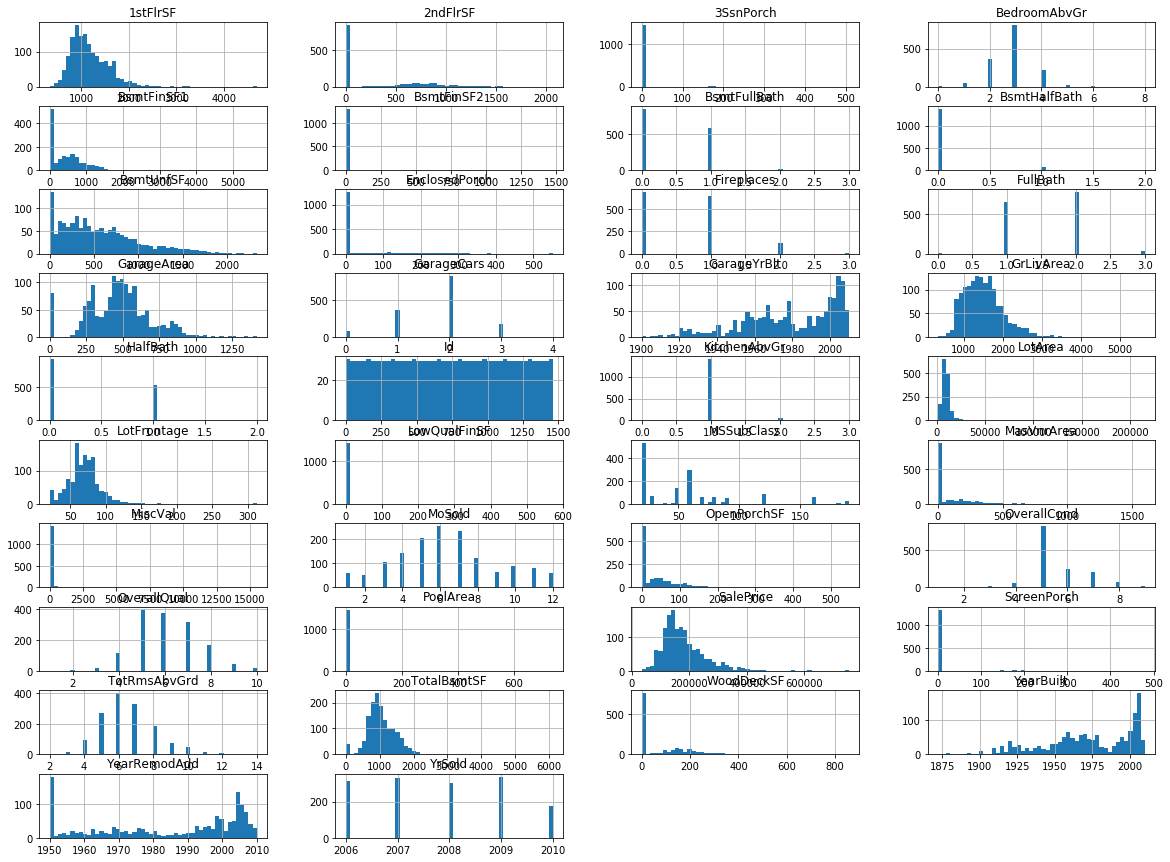

In [4]:
train_cp.hist(bins=50, figsize=(20,15), layout=(10,4))

### Descriptive Statistics

- Check numerical columns using dataframe **describe** method
- Check distribution of each categorical variable using series **value_counts** method

In [5]:
train_cp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Note that some numerical variables are not continuous. They must be regarded as categorical variables:

- MSSubClass
- OverallQual
- OverallCond
- BsmtFullBath	
- BsmtHalfBath	
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- MoSold
- YearBuilt
- YearRemodAdd
- YrSold

Let's add them to the **categorical_features** dataframe, remove from the **numerical_features** dataframe and see the distributions of classes for each variable.

In [102]:
# Numeric variables
numerical_features = train_cp.select_dtypes(include=[np.number])

# Categorical variables
categorical_features = train_cp.select_dtypes(exclude=[np.number])

#numerical_features = numerical_features.loc[:, ~numerical_features.columns.isin(['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YearBuilt','YearRemodAdd','YrSold'])]
#categorical_numerics = train_cp[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YearBuilt','YearRemodAdd','YrSold']]
#categorical_features = pd.concat([categorical_features, categorical_numerics], axis=1, join='inner')

In [7]:
for feature in categorical_features:
    print(categorical_features[feature].value_counts())
    print('*' * 50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**************************************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
**************************************************
Grvl    50
Pave    41
Name: Alley, dtype: int64
**************************************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**************************************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**************************************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**************************************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**************************************************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
********************************************

### Regression Plots

C:\Users\hilmiuysal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


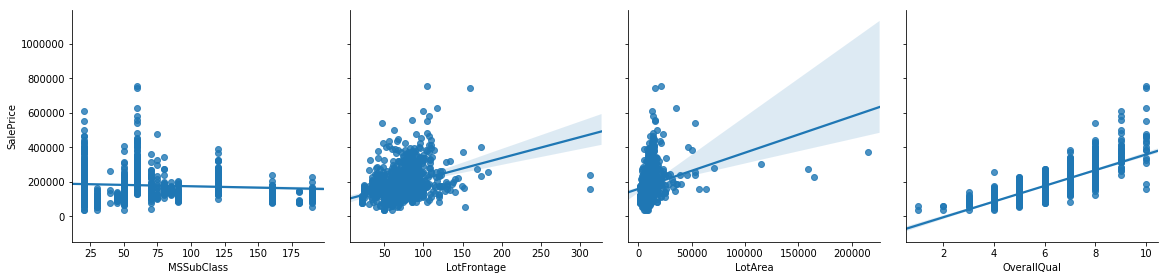

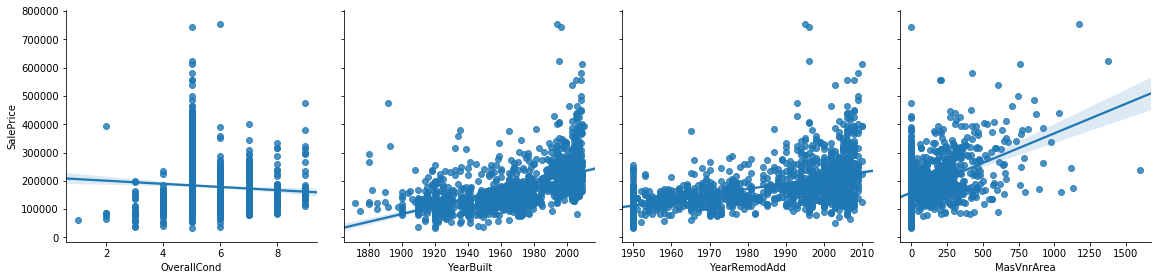

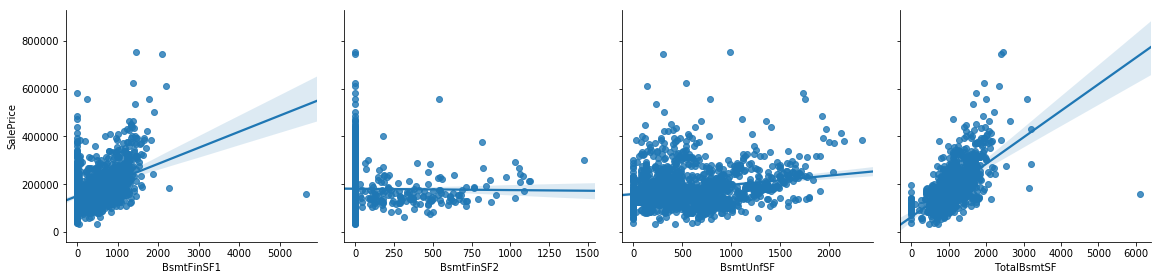

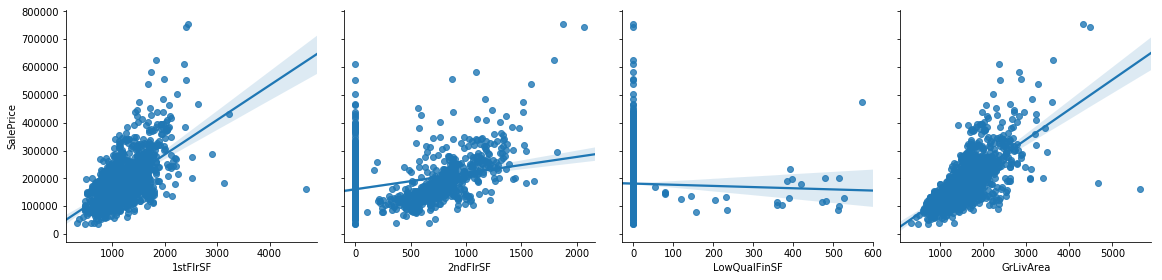

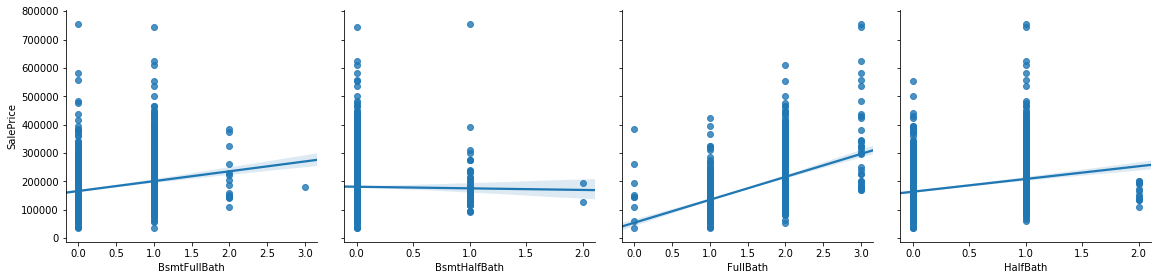

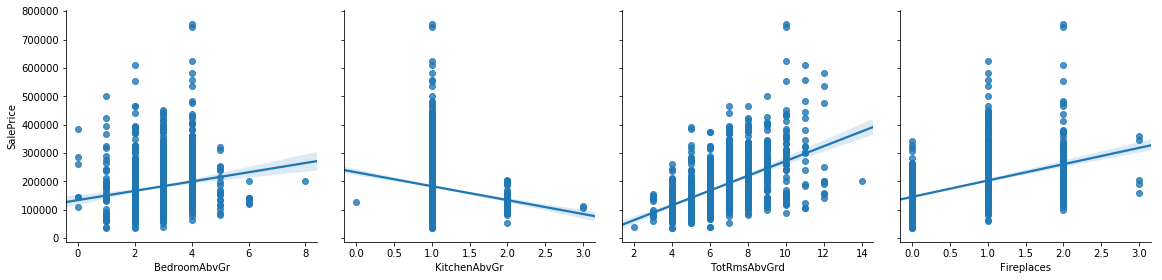

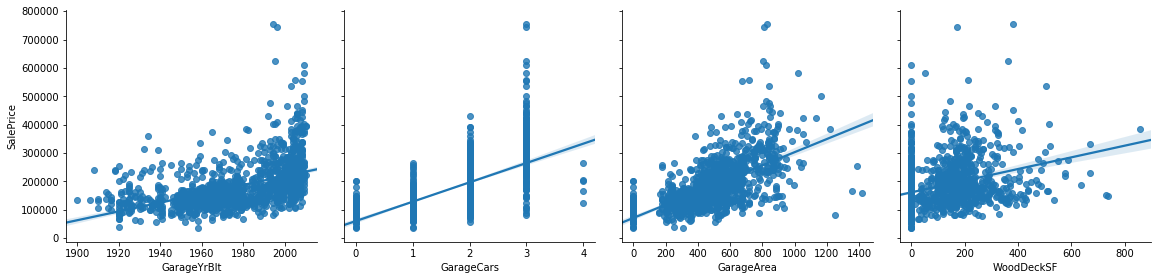

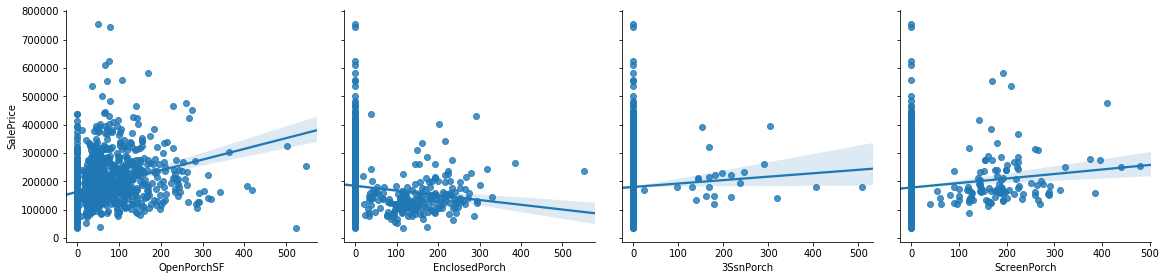

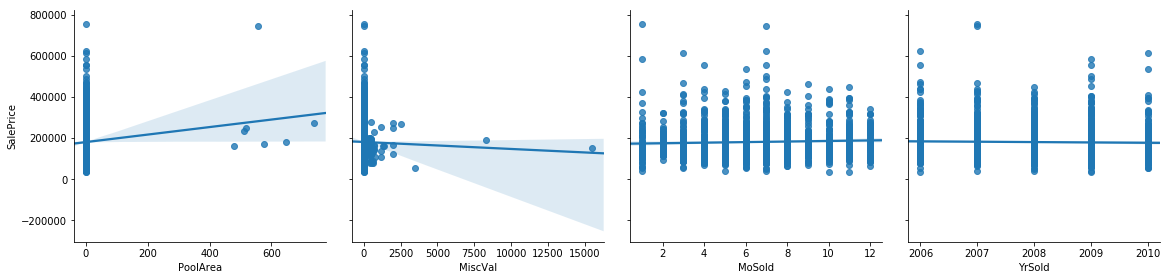

In [8]:
g1 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'], height=4)
g1.map(sns.regplot)

g2 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'], height=4)
g2.map(sns.regplot)

g3 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], height=4)
g3.map(sns.regplot)

g4 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], height=4)
g4.map(sns.regplot)

g5 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], height=4)
g5.map(sns.regplot)

g6 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], height=4)
g6.map(sns.regplot)

g7 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'], height=4)
g7.map(sns.regplot)

g8 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], height=4)
g8.map(sns.regplot)

g9 = sns.PairGrid(train_cp, y_vars=["SalePrice"], x_vars=['PoolArea', 'MiscVal', 'MoSold', 'YrSold'], height=4)
g9.map(sns.regplot)


## Missing Values

In [9]:
nulls = pd.DataFrame(train_cp.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Variable'
nulls

,Null Count
Variable,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


### Drop Columns With Too Many Nulls

   - PoolQC: There are too many null values. We can use PoolArea variable instead. Drop!
   - MiscFeature: There are too many null values. Drop!

In [343]:
# Do not drop them for now. Maybe later
train_cp.drop(['MiscFeature', 'PoolQC'],inplace=True,axis=1)
test_cp.drop(['MiscFeature', 'PoolQC'],inplace=True,axis=1)

### Impute With Constant

   - GarageYrBlt: Nulls exist because there is no Garage. Update nulls with 0
   - MasVnrArea: Nulls exist because there is no Masonry veneer. Update nulls with 0
   
   - Alley: Nulls exist because there is no Alley. Update nulls with 'NoAlley'
   - Fence: Nulls exist because there is no Fence. Update nulls with 'NoFence'
   - FireplaceQu: Nulls exist because there is no Fireplacec. Update nulls with 'NoFireplace'
   - GarageCond: Nulls exist because there is no Garage. Update nulls with 'NoGarage'
   - GarageType: Nulls exist because there is no Garage. Update nulls with 'NoGarage'
   - GarageFinish: Nulls exist because there is no Garage. Update nulls with 'NoGarage'
   - GarageQual: Nulls exist because there is no Garage. Update nulls with 'NoGarage'
   - BsmtExposure: Nulls exist because there is no Basement. Update nulls with 'NoBasement'
   - BsmtFinType2: Nulls exist because there is no Basement. Update nulls with 'NoBasement'
   - BsmtFinType1: Nulls exist because there is no Basement. Update nulls with 'NoBasement'
   - BsmtCond: Nulls exist because there is no Basement. Update nulls with 'NoBasement'
   - BsmtQual: Nulls exist because there is no Basement. Update nulls with 'NoBasement'
   - MasVnrType: Nulls exist because there is no Masonry veneer. Update nulls with 'NoVeneer'


In [344]:
#0
train_cp['GarageYrBlt'].fillna(0, inplace = True)
train_cp['MasVnrArea'].fillna(0, inplace = True)
test_cp['GarageYrBlt'].fillna(0, inplace = True)
test_cp['MasVnrArea'].fillna(0, inplace = True)

#NoSmth
train_cp['Alley'].fillna('NoAlley', inplace = True)
train_cp['Fence'].fillna('NoFence', inplace = True)
train_cp['FireplaceQu'].fillna('NoFireplace', inplace = True)
train_cp['GarageCond'].fillna('NoGarage', inplace = True)
train_cp['GarageType'].fillna('NoGarage', inplace = True)
train_cp['GarageFinish'].fillna('NoGarage', inplace = True)
train_cp['GarageQual'].fillna('NoGarage', inplace = True)
train_cp['BsmtExposure'].fillna('NoBasement', inplace = True)
train_cp['BsmtFinType2'].fillna('NoBasement', inplace = True)
train_cp['BsmtFinType1'].fillna('NoBasement', inplace = True)
train_cp['BsmtCond'].fillna('NoBasement', inplace = True)
train_cp['BsmtQual'].fillna('NoBasement', icnplace = True)
train_cp['MasVnrType'].fillna('NoVeneer', inplace = True)
test_cp['Alley'].fillna('NoAlley', inplace = True)
test_cp['Fence'].fillna('NoFence', inplace = True)
test_cp['FireplaceQu'].fillna('NoFireplace', inplace = True)
test_cp['GarageCond'].fillna('NoGarage', inplace = True)
test_cp['GarageType'].fillna('NoGarage', inplace = True)
test_cp['GarageFinish'].fillna('NoGarage', inplace = True)
test_cp['GarageQual'].fillna('NoGarage', inplace = True)
test_cp['BsmtExposure'].fillna('NoBasement', inplace = True)
test_cp['BsmtFinType2'].fillna('NoBasement', inplace = True)
test_cp['BsmtFinType1'].fillna('NoBasement', inplace = True)
test_cp['BsmtCond'].fillna('NoBasement', inplace = True)
test_cp['BsmtQual'].fillna('NoBasement', inplace = True)
test_cp['MasVnrType'].fillna('NoVeneer', inplace = True)

### Impute With Median

   - LotFrontage: Fill with median

In [345]:
train_cp['LotFrontage'].fillna(train_cp['LotFrontage'].median(), inplace = True)
test_cp['LotFrontage'].fillna(test_cp['LotFrontage'].median(), inplace = True)

### Impute With Mode
   - Electrical: Update with most frequent value

In [346]:
train_cp['Electrical'].fillna(train_cp['Electrical'].value_counts().index[0], inplace = True)
test_cp['Electrical'].fillna(test_cp['Electrical'].value_counts().index[0], inplace = True)

In [347]:
# Check for nulls
train_cp.isnull().any().all()

False

In [348]:
test_cp.isnull().any().all()

False

## Data Transformations

### Log Transformation

Target variable (SalePrice) is highly skewed. In order to solve for skewness, log transformation is applied.

In [14]:
round(train_cp.SalePrice.skew(), 3)

1.883

SalePrice skewness is high. Let's have a look at the histogram.

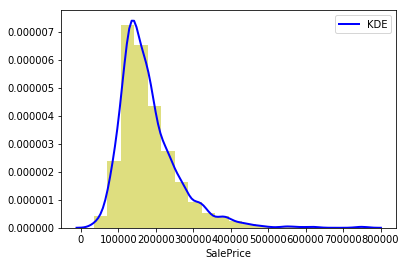

In [15]:
sns.distplot(train_cp['SalePrice'], bins=20, kde=True, 
             kde_kws={"color": "b", "lw": 2, "label": "KDE"}, 
             hist_kws={"linewidth": 2,"alpha": 0.5, "color": "y"})

In [349]:
train_cp['SalePrice'] = np.log(train_cp['SalePrice'])

Check for the skewness and the histogram again. Observe that skewness is much lower and the hist plot is more normal.

In [227]:
round(train_cp['SalePrice'].skew(), 3)

1.883

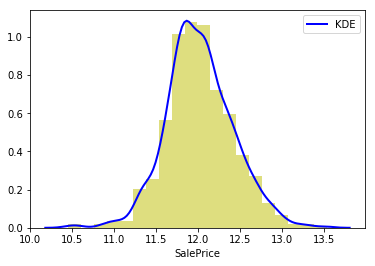

In [18]:
sns.distplot(train_cp['SalePrice'], bins=20, kde=True, 
             kde_kws={"color": "b", "lw": 2, "label": "KDE"}, 
             hist_kws={"linewidth": 2,"alpha": 0.5, "color": "y"})

### Normalization

The continuous numerical columns have diverse standard deviations. They need to be normalized.

In [350]:
# Take numerical and categorical features once again
numerical_features = train_cp.select_dtypes(include=[np.number])
categorical_features = train_cp.select_dtypes(exclude=[np.number])

In [354]:
numerical_features.describe().loc['std',:]

Id                421.610009
MSSubClass         42.300571
LotFrontage        22.027677
LotArea          9981.264932
OverallQual         1.382997
OverallCond         1.112799
YearBuilt          30.202904
YearRemodAdd       20.645407
MasVnrArea        180.731373
BsmtFinSF1        456.098091
BsmtFinSF2        161.319273
BsmtUnfSF         441.866955
TotalBsmtSF       438.705324
1stFlrSF          386.587738
2ndFlrSF          436.528436
LowQualFinSF       48.623081
GrLivArea         525.480383
BsmtFullBath        0.518911
BsmtHalfBath        0.238753
FullBath            0.550916
HalfBath            0.502885
BedroomAbvGr        0.815778
KitchenAbvGr        0.220338
TotRmsAbvGrd        1.625393
Fireplaces          0.644666
GarageYrBlt       453.697295
GarageCars          0.747315
GarageArea        213.804841
WoodDeckSF        125.338794
OpenPorchSF        66.256028
EnclosedPorch      61.119149
3SsnPorch          29.317331
ScreenPorch        55.757415
PoolArea           40.177307
MiscVal       

In [352]:
# Numerical variables which may be regarded as categorical
# 'MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YearBuilt','YearRemodAdd','YrSold'

from sklearn.preprocessing import StandardScaler

#cols_list = list(numerical_features.loc[:, ~numerical_features.columns.isin(['SalePrice','Id','MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'])].columns)
cols_list = list(numerical_features.loc[:, ~numerical_features.columns.isin(['SalePrice','Id'])].columns)

scaler = StandardScaler()
train_cp[cols_list] = scaler.fit_transform(train_cp[cols_list])
test_cp[cols_list] = scaler.fit_transform(test_cp[cols_list])

C:\Users\hilmiuysal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hilmiuysal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\hilmiuysal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hilmiuysal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [353]:
train_cp[cols_list].describe().loc['std',:]

MSSubClass       1.000343
LotFrontage      1.000343
LotArea          1.000343
OverallQual      1.000343
OverallCond      1.000343
YearBuilt        1.000343
YearRemodAdd     1.000343
MasVnrArea       1.000343
BsmtFinSF1       1.000343
BsmtFinSF2       1.000343
BsmtUnfSF        1.000343
TotalBsmtSF      1.000343
1stFlrSF         1.000343
2ndFlrSF         1.000343
LowQualFinSF     1.000343
GrLivArea        1.000343
BsmtFullBath     1.000343
BsmtHalfBath     1.000343
FullBath         1.000343
HalfBath         1.000343
BedroomAbvGr     1.000343
KitchenAbvGr     1.000343
TotRmsAbvGrd     1.000343
Fireplaces       1.000343
GarageYrBlt      1.000343
GarageCars       1.000343
GarageArea       1.000343
WoodDeckSF       1.000343
OpenPorchSF      1.000343
EnclosedPorch    1.000343
3SsnPorch        1.000343
ScreenPorch      1.000343
PoolArea         1.000343
MiscVal          1.000343
MoSold           1.000343
YrSold           1.000343
Name: std, dtype: float64

### Correlation

In [23]:
corr = numerical_features.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageYrBlt      0.349014
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### Outliers

### Dummification

In [277]:
# Take numerical and categorical features once again
numerical_features = train_cp.select_dtypes(include=[np.number])
categorical_features = train_cp.select_dtypes(exclude=[np.number])

In [14]:
# Dummify and drop the dominant category
#train_dummy = pd.get_dummies(train_cp[categorical_features.columns], drop_first=True)
#test_dummy = pd.get_dummies(test_cp[categorical_features.columns], drop_first=True)

In [355]:
# All categorical features
train_cp.loc[:,categorical_features.columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
1,RL,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
2,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
3,RL,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NoFence,WD,Abnorml
4,RL,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal


In [356]:
# Dummify all categorical variables
train_dummy = pd.get_dummies(train_cp.loc[:,categorical_features.columns], drop_first=True)
test_dummy = pd.get_dummies(test_cp.loc[:,categorical_features.columns], drop_first=True)
#train_dummy = pd.get_dummies(train_cp.loc[:, ~train_cp.columns.isin(['HouseStyle', 'Heating', 'RoofMatl', 'Exterior1st', 'Condition2', 'GarageQual', 'Utilities', 'Electrical', 'Exterior2nd', 'SalePrice'])], drop_first=True)
#test_dummy = pd.get_dummies(test_cp.loc[:, ~test_cp.columns.isin(['HouseStyle', 'Heating', 'RoofMatl', 'Exterior1st', 'Condition2', 'GarageQual', 'Utilities', 'Electrical', 'Exterior2nd', 'SalePrice'])], drop_first=True)

In [357]:
print(train_cp.shape)
print(test_cp.shape)

(1460, 79)
(1459, 78)


In [358]:
print(train_dummy.shape)
print(test_dummy.shape)

(1460, 217)
(1459, 201)


In [359]:
train_cp = train_cp.drop(categorical_features.columns, axis=1)
test_cp = test_cp.drop(categorical_features.columns, axis=1)

In [360]:
# Concat
train_cp = pd.concat([train_cp, train_dummy], axis=1)
test_cp = pd.concat([test_cp, test_dummy], axis=1)

In [361]:
print(train_cp.shape)
print(test_cp.shape)

(1460, 255)
(1459, 238)


After dummification, number of columns do not match between train and test datasets. It is because some classes for some categorical variables do not exist in the test dataset.

We need to add those columns manually with value = 0 to the dummified test dataset.

In [369]:
# What are the columns that do not match?
diff_cols = list(set(list(train_cp.columns)) - set(list(test_cp.columns)))
diff_cols = diff_cols[:-1] #Do not drop SalePrice

In [371]:
# Add those columns to test dataset
diff_df = pd.DataFrame(0, index=list(range(1459)), columns = diff_cols)
test_cp = pd.concat([test_cp, diff_df], axis=1, join='inner')
#test_cp.drop(['SalePrice'],inplace=True,axis=1)

In [372]:
print(train_cp.shape)
print(test_cp.shape)

(1460, 255)
(1459, 254)


In [373]:
set(train_cp.columns) - set(test_cp.columns)

{'SalePrice'}

## Model

In [374]:
Y = train_cp['SalePrice']
#X = train_cp.loc[:, ~train_cp.columns.isin(['SalePrice','Id', 'HouseStyle', 'Heating', 'RoofMatl', 'Exterior1st', 'Condition2', 'GarageQual', 'Utilities', 'Electrical', 'Exterior2nd', 'SalePrice'])]
X = train_cp.loc[:, ~train_cp.columns.isin(['SalePrice','Id'])]

In [375]:
#test_dataset = test_cp.loc[:, ~test_cp.columns.isin(['SalePrice','Id', 'HouseStyle', 'Heating', 'RoofMatl', 'Exterior1st', 'Condition2', 'GarageQual', 'Utilities', 'Electrical', 'Exterior2nd', 'SalePrice'])]
test_dataset = test_cp.loc[:, ~test_cp.columns.isin(['Id'])]

In [376]:
# Check if there are any differences between the X predictors and test dataset
set(X.columns) - set(test_dataset.columns)

set()

In [377]:
print(Y.shape)
print(X.shape)
print(test_dataset.shape)
print(test_cp.shape)

(1460,)
(1460, 253)
(1459, 253)
(1459, 254)


In [89]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.25)

In [378]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X, Y)
print("R^2 for train set: %f" %ols.score(X, Y))
#print("R^2 for test set: %f" %ols.score(X_test, Y_test))

R^2 for train set: 0.911946


In [333]:
# Check for Nulls in the test dataset
test_dataset.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
                        ..
Fence_NoFence            0
SaleType_CWD             0
SaleType_Con             0
SaleType_ConLD           0
SaleType_ConLI           0
SaleType_ConLw           0
S

In [380]:
test_dataset['BsmtFullBath'].fillna(test_dataset['BsmtFullBath'].mean(), inplace = True)
test_dataset['BsmtHalfBath'].fillna(test_dataset['BsmtHalfBath'].median(), inplace = True)
test_dataset["GarageCars"].fillna(test_dataset['GarageCars'].median(), inplace=True)
test_dataset["BsmtFinSF1"].fillna(test_dataset['BsmtFinSF1'].median(), inplace=True)
test_dataset["BsmtFinSF2"].fillna(test_dataset['BsmtFinSF2'].median(), inplace=True)
test_dataset["BsmtUnfSF"].fillna(test_dataset['BsmtUnfSF'].median(), inplace=True)
test_dataset["TotalBsmtSF"].fillna(test_dataset['TotalBsmtSF'].median(), inplace=True)
test_dataset["GarageArea"].fillna(test_dataset['GarageArea'].median(), inplace=True)

C:\Users\hilmiuysal\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [135]:
#from sklearn.metrics import mean_squared_error
#print ('RMSE is: \n', mean_squared_error(Y_test, predictions))

RMSE is: 
 1.3467581086958084e+16


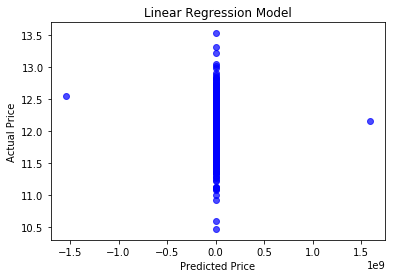

In [136]:
#actual_values = Y_test
#plt.scatter(predictions, actual_values, alpha=.7,
#            color='b') #alpha helps to show overlapping data
#plt.xlabel('Predicted Price')
#plt.ylabel('Actual Price')
#plt.title('Linear Regression Model')
#plt.show()

In [381]:
predictions = ols.predict(test_dataset)

In [382]:
predictions

array([-4.03800716e+11, -2.61916043e+11, -2.38522913e+11, ...,
       -3.16028618e+11, -3.51113555e+11,  6.18805671e+10])

## Submission

In [383]:
submission = pd.DataFrame()
submission['Id'] = test_cp.Id
#test_cp.drop(['Id'], axis=1, inplace=True)

In [384]:
#submissionPredictions = ols.predict(test_cp)
submissionPredictions = np.exp(predictions)

In [385]:
submissionPredictions

array([ 0.,  0.,  0., ...,  0.,  0., inf])

In [389]:
submission['SalePrice'] = pd.Series(submissionPredictions)
print(submission.shape)
submission.sample(5)

(1459, 2)


,Id,SalePrice
1249,2710,0.0
1449,2910,0.0
1040,2501,0.0
1452,2913,0.0
792,2253,0.0


In [46]:
# Output to CSV
submission.to_csv('SalePrice_Prediction_MLR.csv', index=False)

In [40]:
train_cp.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NoVeneer,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleConditi

In [41]:
Y.head()

0    0.560068
1    0.212764
2    0.734046
3   -0.437382
4    1.014651
Name: SalePrice, dtype: float64

In [141]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_NoVeneer,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0,0,1,0,1,1,0,0,0,1,0,0,1,0

In [ ]:
corr = df_train.corr()
corr_abs = corr.abs()
min_val_corr = 0.25

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)